In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [8]:
from private.s3_aws import access_key, secret_access_key

## File upload

In [9]:
df_corr = pd.read_csv(f"s3://cleandatagrupo07/correlation_var.csv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },
)

In [10]:
df_corr.head()

,Unique_City_ID,Date,Price_1Bedroom,Price_2Bedroom,Price_3Bedroom,Price_4Bedroom,Price_5BedroomOrMore,Price_AllHomes,Price_CondoCoop,Price_DuplexTriplex,Price_SingleFamilyResidence,City,County,State,Latitude,Longitude,CrimeRate,Personal_Income
0,fairhopebaldwinal,2016-01-31,262220.833333,340200.0,234950.0,331300.0,443288.75,299900.0,242430.555556,284703.200411,293500.0,Fairhope,Baldwin,AL,30.52297,-87.90333,3480.1,43623
1,fairhopebaldwinal,2016-01-31,262220.833333,340200.0,234950.0,331300.0,443288.75,299900.0,242430.555556,284703.200411,293500.0,Fairhope,Baldwin,AL,30.52297,-87.90333,3480.1,43623
2,fairhopebaldwinal,2016-01-31,262220.833333,340200.0,234950.0,331300.0,443288.75,299900.0,242430.555556,284703.200411,293500.0,Fairhope,Baldwin,AL,30.52297,-87.90333,3480.1,43623
3,fairhopebaldwinal,2016-02-29,262220.833333,340200.0,249900.0,369900.0,443288.75,334783.0,242430.555556,284703.200411,329500.0,Fairhope,Baldwin,AL,30.52297,-87.90333,3480.1,43623
4,fairhopebaldwinal,2016-02-29,262220.833333,340200.0,249900.0,369900.0,443288.75,334783.0,242430.555556,284703.200411,329500.0,Fairhope,Baldwin,AL,30.52297,-87.90333,3480.1,43623


## KNN Regressor model

In [11]:
X=df_corr.drop(['Price_AllHomes','Unique_City_ID','Date','City','County','State'],axis=1)
y=df_corr['Price_AllHomes']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [13]:
knn=KNeighborsRegressor(n_neighbors=100)

In [14]:
knn.fit(x_train.values,y_train.values)

KNeighborsRegressor(n_neighbors=100)

In [15]:
y_pred=knn.predict(x_test.values)

In [16]:
y_train_pred = knn.predict(x_train) # subset de entrenamiento
y_test_pred = knn.predict(x_test) #subset de testeo

c:\Users\fotot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\fotot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


## Model evaluation

In [17]:
r2_score(y_test,y_pred)

0.9312268446721162

In [18]:
accuracy=knn.score(x_test.values,y_test.values)
accuracy

0.9312268446721162

Root mean square error in Train: 40349.63797095946
Root mean square error in Test: 43878.32175395448


C:\Users\fotot\AppData\Local\Temp\ipykernel_11384\2599048515.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
C:\Users\fotot\AppData\Local\Temp\ipykernel_11384\2599048515.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

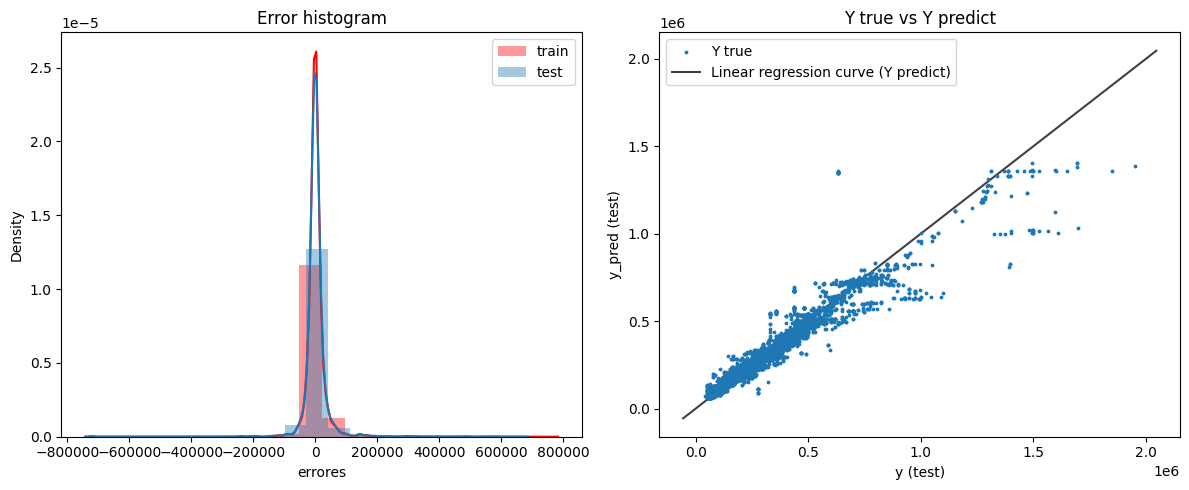

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns


rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Root mean square error in Train: {rmse_train}')
print(f'Root mean square error in Test: {rmse_test}')

plt.figure(figsize = (12,5))

# In this subplot, we plot the error histograms for the training and testing subsets.
plt.subplot(1,2,1)
plt.title('Error histogram')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# In this subplot, we plot the light blue points that represent the actual Y values ​​and the black curve that represents the regression function that created our ML model.
ax = plt.subplot(1,2,2)
plt.title('Y true vs Y predict')
ax.scatter(y_test,y_test_pred, s =3, label = 'Y true')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Linear regression curve (Y predict)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

## Multiple Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [21]:
X1=pd.DataFrame(np.c_[df_corr['Latitude'],df_corr['Longitude'],df_corr['CrimeRate'],df_corr['Personal_Income']],columns=['Latitude','Longitude','CrimeRate','Personal_Income'])
y1=df_corr['Price_AllHomes']

In [22]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.30, random_state=42)

print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(34552, 4) (34552,) (14808, 4) (14808,)


In [23]:
# We instantiate our linear regression and train it

linear_model = LinearRegression()

linear_model.fit(X_train1, y_train1)

LinearRegression()

In [24]:
y_pred1=linear_model.predict(X_test1.values)

c:\Users\fotot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Model evaluation

In [25]:
r2_score(y_test1,y_pred1)

0.43425455702995963

In [26]:
print('The slopes of the linear regression model are:', linear_model.coef_)
print('The ordinate to the origin of the linear regression model is:', linear_model.intercept_)

The slopes of the linear regression model are: [-5127.16220833 -3782.9059452    -20.30766982     7.35449674]
The ordinate to the origin of the linear regression model is: -199608.76879279135


Root mean square error in Train:123851.89663669726
Root mean square error in Test: 126166.06893079756


C:\Users\fotot\AppData\Local\Temp\ipykernel_11384\1112637761.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train1 - y_train_pred1, bins = 20, label = 'train')
C:\Users\fotot\AppData\Local\Temp\ipykernel_11384\1112637761.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test1 - y_te

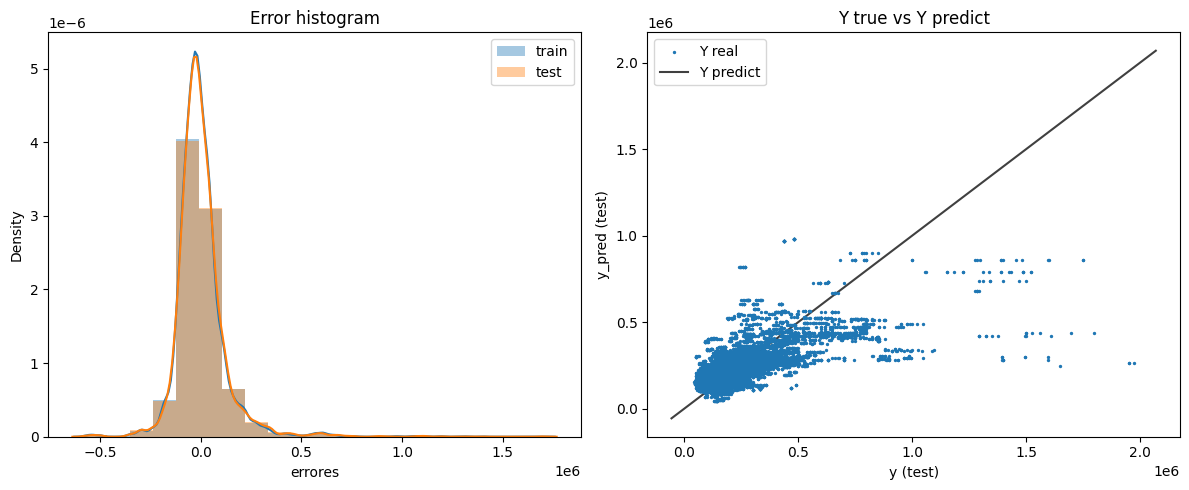

In [27]:
y_train_pred1 = linear_model.predict(X_train1)
y_test_pred1 = linear_model.predict(X_test1)

rmse_train = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
rmse_test = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
print(f'Root mean square error in Train:{rmse_train}')
print(f'Root mean square error in Test: {rmse_test}')

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Error histogram')
sns.distplot(y_train1 - y_train_pred1, bins = 20, label = 'train')
sns.distplot(y_test1 - y_test_pred1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
plt.title('Y true vs Y predict')
ax.scatter(y_test1,y_test_pred1, s =2, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Y predict')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.legend()
plt.tight_layout()
plt.show()